In [1]:

from time import sleep
import json
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import optparse
parser = optparse.OptionParser() 

# define functions

def gene_list(file_list):
    '''
    reads a gene list from a txt files
    '''
    data = pd.read_csv(file_list, sep=' ', header=None)
    genes = data[0].values.tolist()
    return genes


def get_net_image(genes,species=511145,output='full_network.svg'):
    '''
    This function gets a gene list as an input and
    outputs a svg image of the network from those genes
    from strin- db
    A different species and output name can be chosen
    '''
    string_api_url = "https://string-db.org/api"
    output_format = "svg"
    method = "network"

    ## Construct URL
    request_url = "/".join([string_api_url, output_format, method])

    ## Parameters
    params = {
            "identifiers" : "\r".join(genes), # your protein
            "species" : species, # species NCBI identifier 
            "network_flavor": "confidence", # show confidence links
    }

    response = requests.post(request_url, data=params)

    file_name = output
    print(f"Saving interaction network to {output} file")

    with open(file_name, 'wb') as fh:
        fh.write(response.content)

    sleep(1)


def get_enrichment_data(genes):
    '''
    Function gets gene list and extracts functional enrichment (if any)
    '''
    string_api_url = "https://string-db.org/api"
    output_format = "json"
    method = "enrichment"

    ## Construct the request
    request_url = "/".join([string_api_url, output_format, method])

    ## Set parameters
    params = {

        "identifiers" : "%0d".join(genes), # your protein
        "species" : 511145, # species NCBI identifier 
        "caller_identity" : "www.awesome_app.org" # your app name

    }

    ## Call STRING
    response = requests.post(request_url, data=params)
    
    # Read the data
    data = json.loads(response.text)
    
    # transform data to a dataframe
    data_long = pd.DataFrame(data)
    
    return data_long

Saving interaction network to full_network.svg file


<AxesSubplot:xlabel='category', ylabel='count'>

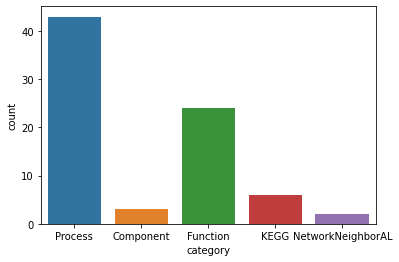

In [2]:
genes = gene_list('dnaK_UP_distinct.txt')
get_net_image(genes)
enrich = get_enrichment_data(genes)
sns.countplot(x="category", data=enrich)

In [3]:
genes

['accC',
 'aceK',
 'alaA',
 'alr',
 'ampD',
 'arcB',
 'aroD',
 'atpF',
 'atpG',
 'atpH',
 'bamA',
 'betI',
 'bioD1',
 'birA',
 'cdaR',
 'coaE',
 'creA',
 'crp',
 'cydA',
 'ddlA',
 'degP',
 'dgoR',
 'dgt',
 'dhaM',
 'dld',
 'dusA',
 'ebgR',
 'entC',
 'fabB',
 'fabD',
 'fabG',
 'fadD',
 'fadI',
 'fdhE',
 'fhuF',
 'fimC',
 'folA',
 'folX',
 'fucA',
 'fucR',
 'gabD',
 'gatY',
 'gatZ',
 'ghrB',
 'glcB',
 'glnQ',
 'glpR',
 'glpX',
 'gltL',
 'gsk',
 'gss',
 'guaC',
 'kbl',
 'kdsA',
 'ldcA',
 'leuD',
 'lplA',
 'mazF',
 'metF',
 'mglA',
 'mlaD',
 'mlc',
 'moaE',
 'mrp',
 'murQ',
 'mutT',
 'nagD',
 'nagK',
 'nanM',
 'nuoH',
 'nuoJ',
 'nuoL',
 'ompW',
 'patA',
 'pepQ',
 'pgsA',
 'phoQ',
 'pncC',
 'ppx',
 'pykA',
 'queC',
 'relA',
 'ribA',
 'ribC',
 'rlmF',
 'rpiR',
 'rutR',
 'ruvA',
 'skp',
 'slt',
 'sthA',
 'tatD',
 'thrS',
 'trmJ',
 'trpB',
 'trxB',
 'uspA',
 'uvrD',
 'uxaA',
 'uxuA',
 'valS',
 'xylB',
 'yafC',
 'yagI',
 'yaiL',
 'ybdH',
 'ycbL',
 'yceH',
 'ychJ',
 'ydcY',
 'yeaE',
 'yecE',
 'y

In [3]:
genes

['accC',
 'aceK',
 'alaA',
 'alr',
 'ampD',
 'arcB',
 'aroD',
 'atpF',
 'atpG',
 'atpH',
 'bamA',
 'betI',
 'bioD1',
 'birA',
 'cdaR',
 'coaE',
 'creA',
 'crp',
 'cydA',
 'ddlA',
 'degP',
 'dgoR',
 'dgt',
 'dhaM',
 'dld',
 'dusA',
 'ebgR',
 'entC',
 'fabB',
 'fabD',
 'fabG',
 'fadD',
 'fadI',
 'fdhE',
 'fhuF',
 'fimC',
 'folA',
 'folX',
 'fucA',
 'fucR',
 'gabD',
 'gatY',
 'gatZ',
 'ghrB',
 'glcB',
 'glnQ',
 'glpR',
 'glpX',
 'gltL',
 'gsk',
 'gss',
 'guaC',
 'kbl',
 'kdsA',
 'ldcA',
 'leuD',
 'lplA',
 'mazF',
 'metF',
 'mglA',
 'mlaD',
 'mlc',
 'moaE',
 'mrp',
 'murQ',
 'mutT',
 'nagD',
 'nagK',
 'nanM',
 'nuoH',
 'nuoJ',
 'nuoL',
 'ompW',
 'patA',
 'pepQ',
 'pgsA',
 'phoQ',
 'pncC',
 'ppx',
 'pykA',
 'queC',
 'relA',
 'ribA',
 'ribC',
 'rlmF',
 'rpiR',
 'rutR',
 'ruvA',
 'skp',
 'slt',
 'sthA',
 'tatD',
 'thrS',
 'trmJ',
 'trpB',
 'trxB',
 'uspA',
 'uvrD',
 'uxaA',
 'uxuA',
 'valS',
 'xylB',
 'yafC',
 'yagI',
 'yaiL',
 'ybdH',
 'ycbL',
 'yceH',
 'ychJ',
 'ydcY',
 'yeaE',
 'yecE',
 'y

In [9]:
proc_names = enrich[enrich['category']=='Process']['description'].tolist()

In [10]:
proc_names

['organic substance metabolic process',
 'metabolic process',
 'cellular metabolic process',
 'small molecule metabolic process',
 'primary metabolic process',
 'organonitrogen compound metabolic process',
 'cellular process',
 'nitrogen compound metabolic process',
 'purine nucleotide metabolic process',
 'purine ribonucleotide metabolic process',
 'ribonucleotide metabolic process',
 'organic cyclic compound biosynthetic process',
 'heterocycle biosynthetic process',
 'monocarboxylic acid metabolic process',
 'nucleotide metabolic process',
 'phosphorus metabolic process',
 'phosphate-containing compound metabolic process',
 'heterocycle metabolic process',
 'carbohydrate derivative metabolic process',
 'biosynthetic process',
 'organic cyclic compound metabolic process',
 'cellular nitrogen compound metabolic process',
 'organic substance biosynthetic process',
 'cellular biosynthetic process',
 'organophosphate metabolic process',
 'carboxylic acid metabolic process',
 'oxoacid met

In [11]:
Counter(proc_names)

NameError: name 'Counter' is not defined

In [12]:
from collections import Counter

In [18]:
proc_names[0].split()

['organic', 'substance', 'metabolic', 'process']

In [19]:
words = []
for elm in proc_names:
    for word in elm.split():
        words.append(word)

In [20]:
words

['organic',
 'substance',
 'metabolic',
 'process',
 'metabolic',
 'process',
 'cellular',
 'metabolic',
 'process',
 'small',
 'molecule',
 'metabolic',
 'process',
 'primary',
 'metabolic',
 'process',
 'organonitrogen',
 'compound',
 'metabolic',
 'process',
 'cellular',
 'process',
 'nitrogen',
 'compound',
 'metabolic',
 'process',
 'purine',
 'nucleotide',
 'metabolic',
 'process',
 'purine',
 'ribonucleotide',
 'metabolic',
 'process',
 'ribonucleotide',
 'metabolic',
 'process',
 'organic',
 'cyclic',
 'compound',
 'biosynthetic',
 'process',
 'heterocycle',
 'biosynthetic',
 'process',
 'monocarboxylic',
 'acid',
 'metabolic',
 'process',
 'nucleotide',
 'metabolic',
 'process',
 'phosphorus',
 'metabolic',
 'process',
 'phosphate-containing',
 'compound',
 'metabolic',
 'process',
 'heterocycle',
 'metabolic',
 'process',
 'carbohydrate',
 'derivative',
 'metabolic',
 'process',
 'biosynthetic',
 'process',
 'organic',
 'cyclic',
 'compound',
 'metabolic',
 'process',
 'cellu

In [23]:
Counter(words)

Counter({'organic': 5,
         'substance': 3,
         'metabolic': 27,
         'process': 42,
         'cellular': 6,
         'small': 3,
         'molecule': 3,
         'primary': 1,
         'organonitrogen': 2,
         'compound': 12,
         'nitrogen': 3,
         'purine': 5,
         'nucleotide': 2,
         'ribonucleotide': 3,
         'cyclic': 2,
         'biosynthetic': 12,
         'heterocycle': 2,
         'monocarboxylic': 2,
         'acid': 3,
         'phosphorus': 1,
         'phosphate-containing': 1,
         'carbohydrate': 2,
         'derivative': 2,
         'organophosphate': 1,
         'carboxylic': 1,
         'oxoacid': 1,
         'aromatic': 2,
         'nucleoside': 1,
         'triphosphate': 2,
         'catabolic': 2,
         'nucleobase-containing': 3,
         'drug': 1,
         'peptidoglycan': 1,
         'turnover': 1,
         'ribonucleoside': 1})

In [33]:
word_df = pd.DataFrame.from_dict(Counter(words), orient='index',columns=['count'])

In [34]:
word_df

,count
organic,5
substance,3
metabolic,27
process,42
cellular,6
small,3
molecule,3
primary,1
organonitrogen,2
compound,12


In [37]:
word_df['word'] = word_df.index

In [49]:
word_df.loc[word_df['word']!=['metabolic'],:]

ValueError: ('Lengths must match to compare', (35,), (1,))